# PCA

In [15]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris_dataset = load_iris()

# Access the features and target variable
X = iris_dataset.data  # Features (data matrix)
y = iris_dataset.target  # Classification target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
import numpy as np
mean_values = np.mean(X, axis=0)
variance_values = np.var(X, axis=0)
std_X = (X - mean_values)/variance_values
print(std_X)

[[-1.09133619e+00  2.34571507e+00 -7.61750273e-01 -1.73154806e+00]
 [-1.38496925e+00 -3.03812494e-01 -7.61750273e-01 -1.73154806e+00]
 [-1.67860231e+00  7.55998530e-01 -7.94055204e-01 -1.73154806e+00]
 [-1.82541883e+00  2.26093018e-01 -7.29445342e-01 -1.73154806e+00]
 [-1.23815272e+00  2.87562058e+00 -7.61750273e-01 -1.73154806e+00]
 [-6.50886609e-01  4.46533711e+00 -6.64835480e-01 -1.38500742e+00]
 [-1.82541883e+00  1.81580955e+00 -7.61750273e-01 -1.55827774e+00]
 [-1.23815272e+00  1.81580955e+00 -7.29445342e-01 -1.73154806e+00]
 [-2.11905189e+00 -8.33718005e-01 -7.61750273e-01 -1.73154806e+00]
 [-1.38496925e+00  2.26093018e-01 -7.29445342e-01 -1.90481838e+00]
 [-6.50886609e-01  3.40552609e+00 -7.29445342e-01 -1.73154806e+00]
 [-1.53178578e+00  1.81580955e+00 -6.97140411e-01 -1.73154806e+00]
 [-1.53178578e+00 -3.03812494e-01 -7.61750273e-01 -1.90481838e+00]
 [-2.26586842e+00 -3.03812494e-01 -8.58665065e-01 -1.90481838e+00]
 [-6.36204956e-02  4.99524263e+00 -8.26360135e-01 -1.73154806e

In [21]:
cov = np.cov(std_X.T)
print(cov.shape)
print(cov)

(4, 4)
[[ 1.47801874 -0.33013183  0.60439479  1.31333827]
 [-0.33013183  5.33461925 -0.56432428 -1.11685499]
 [ 0.60439479 -0.56432428  0.32521743  0.72521551]
 [ 1.31333827 -1.11685499  0.72521551  1.74433207]]


In [22]:
eig_vals = np.linalg.eig(cov)
print(eig_vals)

(array([5.90436257, 2.73033279, 0.2380396 , 0.00945254]), array([[-0.18745664,  0.64787489,  0.72258444,  0.1516241 ],
       [ 0.91163197,  0.39444472, -0.1093713 , -0.03712713],
       [-0.15554956,  0.25152848, -0.06590395, -0.95299235],
       [-0.33104605,  0.60116963, -0.67938672,  0.25968689]]))


[2.93808505 0.9201649  0.14774182 0.02085386] [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


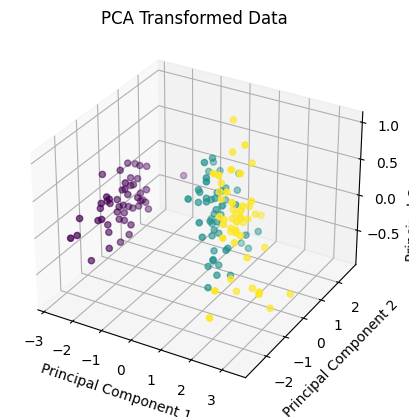

<Figure size 640x480 with 0 Axes>

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def standardize_data(X):
    """
    Standaryzacja danych: odjęcie średniej i podzielenie przez odchylenie standardowe.
    """
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_std = (X - mean) / std
    return X_std

def pca(X, num_components):
    """
    Procedura PCA.
    """
    # Standaryzacja danych
    X_std = standardize_data(X)
    
    # Obliczenie macierzy kowariancji
    X_cov = np.cov(X_std, rowvar=False)
    
    # Obliczenie wartości i wektorów własnych macierzy kowariancji
    eigen_values, eigen_vectors = np.linalg.eig(X_cov)
    print(eigen_values, eigen_vectors)
    
    # Sortowanie wartości i wektorów własnych w malejącej kolejności
    sorted_indices = np.argsort(eigen_values)[::-1]
    eigen_values = eigen_values[sorted_indices]
    eigen_vectors = eigen_vectors[:, sorted_indices]
    
    # Wybór num_components największych wartości własnych i odpowiadających im wektorów własnych
    selected_eigen_vectors = eigen_vectors[:, :num_components]
    
    # Przekształcenie danych
    transformed_data = X_std @ selected_eigen_vectors
    
    return transformed_data, selected_eigen_vectors

def plot_pca(X, transformed_data, labels, title):
    """
    Wyrysowanie wykresów po przekształceniu i redukcji wymiarowości.
    """
    num_dimensions = transformed_data.shape[1]
    
    # if num_dimensions == 1:
    #     plt.figure()
    #     plt.scatter(transformed_data[:, 0], np.zeros(transformed_data.shape[0]))
    #     plt.title(title)
    #     plt.xlabel('Principal Component 1')
    #     plt.show()
    # elif num_dimensions == 2:
    #     plt.figure()
    #     plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
    #     plt.title(title)
    #     plt.xlabel('Principal Component 1')
    #     plt.ylabel('Principal Component 2')
    #     plt.show()
    # elif num_dimensions == 3:
    #     fig = plt.figure()
    #     ax = fig.add_subplot(111, projection='3d')
    #     ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2])
    #     ax.set_title(title)
    #     ax.set_xlabel('Principal Component 1')
    #     ax.set_ylabel('Principal Component 2')
    #     ax.set_zlabel('Principal Component 3')
    #     plt.show()


    if num_dimensions == 1:
        plt.figure()
        plt.scatter(transformed_data[:, 0], np.zeros(transformed_data.shape[0]), c=labels)
        plt.title(title)
        plt.xlabel('Principal Component 1')
        # plt.colorbar(label='Class')
        plt.show()
    elif num_dimensions == 2:
        plt.figure()
        plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels)
        plt.title(title)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        # plt.colorbar(label='Class')
        plt.show()
    elif num_dimensions == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2], c=labels)
        ax.set_title(title)
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_zlabel('Principal Component 3')
        # plt.colorbar(label='Class')
        plt.show()
# Przykładowe dane
# X = np.random.rand(100, 5)  # 100 przykładów, 5 cech

# Wywołanie algorytmu PCA
transformed_data, eigen_vectors = pca(X, num_components=3)

# Wyrysowanie wykresów
plot_pca(X, transformed_data, y, title='PCA Transformed Data')



In [18]:
plot_pca(X, X, y, title='Original')

[2.93808505 0.9201649  0.14774182 0.02085386] [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


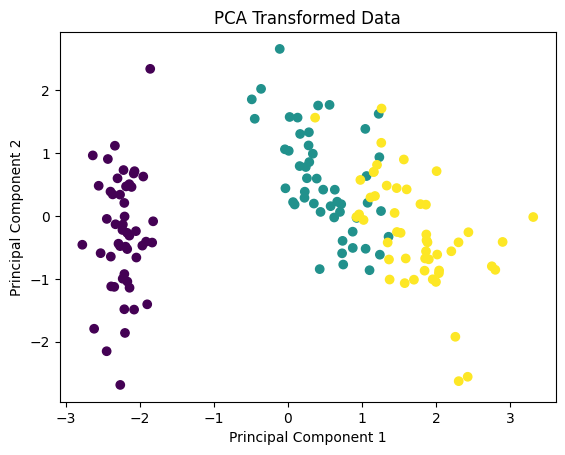

In [11]:
transformed_data, eigen_vectors = pca(X, num_components=2)

# Wyrysowanie wykresów
plot_pca(X, transformed_data, y, title='PCA Transformed Data')

[2.93808505 0.9201649  0.14774182 0.02085386] [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


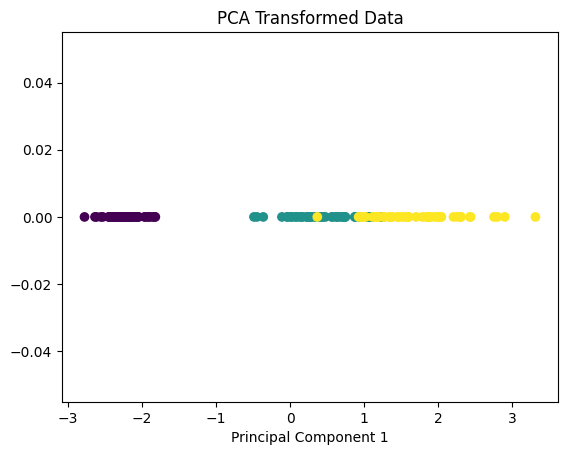

In [13]:
transformed_data, eigen_vectors = pca(X, num_components=1)

# Wyrysowanie wykresów
plot_pca(X, transformed_data, y, title='PCA Transformed Data')